In [1]:
import pandas as pd
import numpy as np
import support as sp
import tree as tr
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from sklearn import preprocessing

In [2]:
# full=False means attentional framing only
# full=True means attentional framing and semantic relations
def load_files(full=False):
    if full:
        asia_seq = sp.load_obj('asia_seq_2')
        america_seq = sp.load_obj('america_seq_2')
        europe_seq = sp.load_obj('europe_seq_2')
        asia_pat = sp.load_obj('asia_pat_2')
        america_pat = sp.load_obj('america_pat_2')
        europe_pat = sp.load_obj('europe_pat_2')
    else:
        asia_seq = sp.load_obj('asia_seq')
        america_seq = sp.load_obj('america_seq')
        europe_seq = sp.load_obj('europe_seq')
        asia_pat = sp.load_obj('asia_pat')
        america_pat = sp.load_obj('america_pat')
        europe_pat = sp.load_obj('europe_pat')
        
    return asia_seq, america_seq, europe_seq, asia_pat, america_pat, europe_pat
        
asia_seq, america_seq, europe_seq, asia_pat, america_pat, europe_pat = load_files(full=False)



FileNotFoundError: [Errno 2] No such file or directory: 'obj/asia_seq.pkl'

In [2]:
#sequences = sp.load_obj('sequences')
#patterns = sp.load_obj('patterns')
#sequences_half = sp.load_obj('sequences_half')
#patterns_half = sp.load_obj('patterns_half')
patterns_lt = sp.load_obj('patterns_full_lt')
sequences_lt = sp.load_obj('sequences_full_lt')

len(sequences_lt)

253

In [3]:
# checking which pattern occurs in each comic book and appending them to list, appending list of patterns in comic book to final list
# This creates the dataformat we can use for the decision tree

def format_pattern(seq, pat):
    final = []

    for j in seq:
        init = []
        for i in pat[:]:
            for pattern in i:
                if not len(pattern) >= 2:
                    continue
                elif sp.contains_sublist(j, list(pattern)):
                    init.append(list(pattern))
        init.append(j[-4:])
        final.append(init)

    return final

#asia = format_pattern(asia_seq, asia_pat)
#america = format_pattern(america_seq, america_pat)
#europe = format_pattern(europe_seq, europe_pat)
#complete = format_pattern(sequences, patterns)
#half = format_pattern(sequences_half, patterns_half)
lt = format_pattern(sequences_lt, patterns_lt)
#print(asia[0], america[0], europe[0])
#print(lt)

In [4]:
import random

def append_random(split=False):
    buffer = []
    final = []
    if split:
        for each in asia:
            buffer.append(each)
        for one in america:
            buffer.append(one)
        for some in europe:
            buffer.append(some)
            
        index_list = random.sample(range(len(buffer)), len(buffer))    
        for i in index_list:
            final.append(buffer[i])

        return final

    else:
        for some in sequences_lt:
            buffer.append(some)

        return buffer

final = append_random()
#print(final[0])

In [5]:
#helper function to recode patterns - Destructive function! Will adjust alt_d
alt_d = {}
index = 1
check = ['macro', 'mono', 'micro', 'amorphic', 'amb']

def helper(pat, d, index, min_l, max_l):
    for i in pat:
        for j in list(i):
            if len(j) < min_l or len(j) > max_l:
                continue
            elif j[0] in check and j[-1] in check:
                if j in d:
                    continue
                else:
                    d[j] = index
                    index += 1

    return d

In [6]:
#asia_help = helper(asia_pat, alt_d, index, 2, 25)
#america_help = helper(america_pat, alt_d, index, 2, 25)
#europe_help = helper(europe_pat, alt_d, index, 2, 25)
#complete_help = helper(patterns, alt_d, index, 2, 50000)
#half_help = helper(patterns_half, alt_d, index, 2, 50000)
lt_help = helper(patterns_lt, alt_d, index, 2, 50000)
print(alt_d)
print(len(alt_d))
#print(len(alt_d), len(test) + len(test2) + len(test3))

{('macro', 'character_change', 'macro'): 1, ('macro', 'character_change', 'mono'): 2, ('macro', 'time_change', 'macro'): 3, ('mono', 'character_change', 'macro'): 4, ('mono', 'character_change', 'mono'): 5, ('mono', 'time_change', 'mono'): 6, ('amorphic', 'character_change', 'spatial_change', 'macro'): 7, ('macro', 'causal_change', 'time_change', 'macro'): 8, ('macro', 'character_change', 'spatial_change', 'amorphic'): 9, ('macro', 'character_change', 'spatial_change', 'macro'): 10, ('macro', 'character_change', 'spatial_change', 'mono'): 11, ('macro', 'character_change', 'time_change', 'macro'): 12, ('macro', 'character_change', 'time_change', 'mono'): 13, ('macro', 'spatial_change', 'time_change', 'macro'): 14, ('micro', 'character_change', 'time_change', 'macro'): 15, ('mono', 'causal_change', 'time_change', 'mono'): 16, ('mono', 'character_change', 'spatial_change', 'amorphic'): 17, ('mono', 'character_change', 'spatial_change', 'macro'): 18, ('mono', 'character_change', 'spatial_c

In [7]:
def binary(entry, year): #function to change decades to either be higher or equal to 1980 or lower
    split = list(entry)
    split[:4] = [int(''.join(split[0:4]))]
    if split[0] >= year:
        return 'A'+str(year)#'>=' + str(year) + 's'
    else:
        return 'B'+str(year)#'<' + str(year) + 's'

# d=complete sequence of all comics, alt_d=dictionary with all patterns, binarize=binary, year= year to split data on, last two optional
def alt_pat(d, alt_d, binarize=False, year=None): 
    return_l =[]
    for entry in d:
        l = []
        for key in alt_d:
            if list(key) in entry:
                l.append(1)
            else:
                l.append(0)
            #if len(l) > 21:
             #   break
        if binarize == True:
            decade = binary(entry[-1][0], year)
        else:
            decade = entry[-1][0]
        l.append(decade)
        l.extend(entry[-1][1:])
        return_l.append(l)
    return return_l
            
try:           
    tree_data = alt_pat(lt, alt_d, False, 1980)
    print('first', len(tree_data))
    tree_data_imp = alt_pat(lt, first_feat, False, 1980)
    print('second', len(tree_data_imp))
except:
    pass


# returns a list of patterns existing per comic book

first 253


In [8]:
# load data and fit
def feat_selection(important=False, setting=4):
    input_data = []
    label_data = []
    names = ['Country/Decade', 'Country', 'Continent', 'Decade']
    if important:
        for i in tree_data_imp:
            input_data.append(i[:-4])
            label_data.append(str(i[-setting]))
    else:
        for i in tree_data:
            input_data.append(i[:-4])
            label_data.append(str(i[-setting]))
    
    name = names[setting-1]
    
    return input_data, label_data, name


setting = 2
input_data, label_data, name = feat_selection(False, setting=setting)

decision_tree = tr.fit(input_data, label_data)
#print(decision_tree)
#print(label_data)
print(np.unique(label_data))

['American' 'Chinese' 'Dutch' 'Flemish' 'French' 'German' 'Japanese'
 'Korean' 'Spanish' 'Swedish']


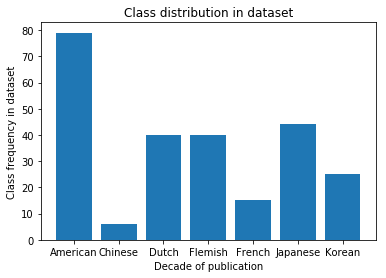

['American' 'Chinese' 'Dutch' 'Flemish' 'French' 'Japanese' 'Korean']


In [11]:
from itertools import groupby
freq = {key:len(list(group)) for key, group in groupby(np.sort(label_data))}

lists = sorted(freq.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.bar(x, y)
plt.ylabel('Class frequency in dataset')
plt.xlabel("Decade of publication")
plt.title('Class distribution in dataset')
plt.show()

# for country remove class labels with only one datapoint
temp = []
for value in lists:
    if value[1] < 3:
        temp.append(value[0])
        
for index, label in enumerate(label_data):
    if label in temp:
        label_data.remove(label)
        input_data.remove(input_data[index])
        
print(np.unique(label_data))

In [12]:
print('\t\tData\t\t\tTruth\tPrediction')
predict = []
for row, label in zip(input_data, label_data):
    predict.append(str(tr.predict(decision_tree, row)))
    print(row, '\t', label, '\t', tr.predict(decision_tree, row))

		Data			Truth	Prediction
[0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1] 	 Japanese 	 French
[0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0] 	 Dutch 	 French
[0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 	 Dutch 	 French
[1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1] 	 Flemish 	 French
[0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1] 	 Flemish 	 French
[0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1] 	 Flemish 	 French
[0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [13]:
def acc(label, predict):
    correct = 0
    wrong = 0
    for i in range(len(label)):
        if predict[i] == label[i]:
            correct += 1
        else:
            wrong += 1
    true = correct/len(predict)*100
    false = wrong/len(predict)*100
    return true, false

true, false = acc(label_data, predict)
print('True:', true, 'False:', false)

True: 10.040160642570282 False: 89.95983935742971


### Scikit learn decision tree

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree

In [16]:
X_train, X_test, y_train, y_test = train_test_split(input_data, label_data, 
                                                    test_size = 0.3, random_state = 100, 
                                                    stratify=label_data)
#print(y_train)

TypeError: Invalid parameters passed: {'class_weight': None}

In [74]:
len(label_data), len(y_train), len(y_test)


(249, 174, 75)

### Gini

In [75]:
param_grid = {"criterion": ["gini"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None],
              "random_state": [100]
              }

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, n_jobs=4)
clf.fit(X=X_train, y=y_train)
#tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.4425287356321839 {'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 100}


In [76]:
tree_model = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2)
#clf_gini.fit(X_train, y_train)
#clf_gini.fit(X_train, y_train)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [77]:
#y_pred = clf_gini.predict(X_test)
y_pred = tree_model.predict(X_test)
print(y_pred)

['Japanese' 'Flemish' 'Korean' 'Dutch' 'Dutch' 'Korean' 'American'
 'American' 'Japanese' 'Dutch' 'American' 'French' 'Dutch' 'Japanese'
 'Dutch' 'Dutch' 'American' 'Korean' 'Korean' 'Flemish' 'Flemish'
 'American' 'Dutch' 'American' 'Japanese' 'American' 'Flemish' 'Japanese'
 'Flemish' 'Japanese' 'Dutch' 'American' 'American' 'Flemish' 'Dutch'
 'American' 'Dutch' 'Flemish' 'Dutch' 'Flemish' 'American' 'French'
 'French' 'Japanese' 'American' 'American' 'Dutch' 'Dutch' 'French'
 'American' 'American' 'American' 'Dutch' 'American' 'American' 'Flemish'
 'Dutch' 'American' 'Korean' 'Dutch' 'Korean' 'Dutch' 'American'
 'Japanese' 'Flemish' 'Korean' 'American' 'Dutch' 'Flemish' 'Japanese'
 'American' 'Chinese' 'Chinese' 'Japanese' 'Flemish']


In [78]:
scores = cross_val_score(tree_model, input_data, label_data, cv=10)
scores

e:\users\maarten\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


array([0.33, 0.37, 0.33, 0.22, 0.31, 0.46, 0.39, 0.57, 0.35, 0.36])

In [79]:
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)
print('Average fold accuracy is ', np.mean(scores)*100)

Accuracy is  53.333333333333336
Average fold accuracy is  36.93269090008221


### Confusion matrix

Confusion matrix, without normalization
[[14  1  2  3  0  2  2]
 [ 0  0  0  0  0  2  0]
 [ 0  0 10  2  0  0  0]
 [ 0  0  5  5  2  0  0]
 [ 2  0  0  1  1  0  0]
 [ 5  0  1  1  1  5  0]
 [ 1  1  0  0  0  1  5]]
Normalized confusion matrix
[[0.58 0.04 0.08 0.12 0.   0.08 0.08]
 [0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.83 0.17 0.   0.   0.  ]
 [0.   0.   0.42 0.42 0.17 0.   0.  ]
 [0.5  0.   0.   0.25 0.25 0.   0.  ]
 [0.38 0.   0.08 0.08 0.08 0.38 0.  ]
 [0.12 0.12 0.   0.   0.   0.12 0.62]]


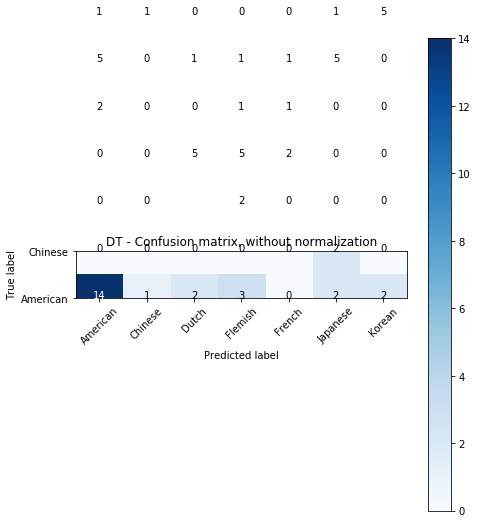

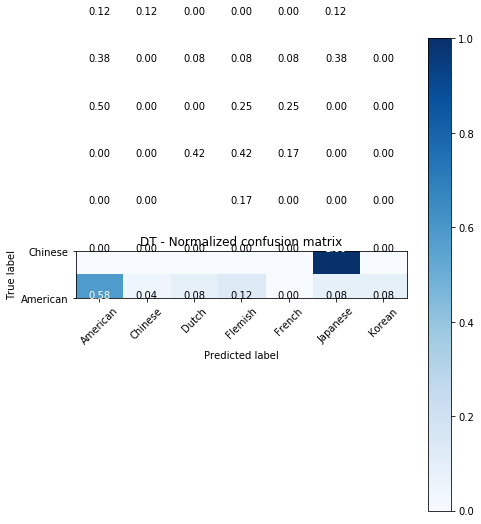

In [80]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
labels = np.unique(y_test)

plot1 = plt.figure(figsize=(len(labels), len(labels)))
sp.plot_confusion_matrix(cnf_matrix, classes=labels,
                      title='DT - Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot2 = plt.figure(figsize=(len(labels), len(labels)))
sp.plot_confusion_matrix(cnf_matrix, classes=labels, normalize=True,
                      title='DT - Normalized confusion matrix')
plt.show()

### Naive Bayes

In [124]:
from sklearn.naive_bayes import GaussianNB

In [55]:
clf_bayes = GaussianNB()
clf_bayes.fit(X_train, y_train)

GaussianNB(priors=None)

In [56]:
scores_b = cross_val_score(clf_bayes, input_data, label_data, cv=10)
scores_b

array([0.77, 0.88, 0.73, 0.65, 0.73, 0.6 , 0.64, 0.8 , 0.64, 0.52])

In [57]:
y_bayes_pred = clf_bayes.predict(X_test)
print(y_bayes_pred)
score = clf_bayes.score(X_test, y_test)
print("Accuracy is ", score*100)
print('Average fold accuracy is ', np.mean(scores_b)*100)

['Asia' 'Europe' 'Europe' 'America' 'America' 'America' 'Asia' 'Europe'
 'Europe' 'Europe' 'Asia' 'Europe' 'America' 'Europe' 'Asia' 'Asia'
 'America' 'Europe' 'Europe' 'Europe' 'Europe' 'Europe' 'Europe' 'Europe'
 'Europe' 'Europe' 'Europe' 'Asia' 'Asia' 'Asia' 'Asia' 'Europe' 'Asia'
 'Asia' 'Europe' 'Europe' 'America' 'Europe' 'Europe' 'Europe' 'Europe'
 'America' 'Europe' 'Europe' 'America' 'Asia' 'Asia' 'Europe' 'America'
 'Europe' 'Europe' 'Europe' 'Europe' 'America' 'Asia' 'Europe' 'Asia'
 'America' 'Europe' 'America' 'Asia' 'Europe' 'Europe' 'Europe' 'Europe'
 'Europe' 'Europe' 'Europe' 'America' 'Europe' 'America' 'Europe' 'Europe'
 'America' 'Europe' 'Europe']
Accuracy is  67.10526315789474
Average fold accuracy is  69.7096989966555


Confusion matrix, without normalization
[[10  2 12]
 [ 4 13  5]
 [ 1  1 28]]
Normalized confusion matrix
[[0.42 0.08 0.5 ]
 [0.18 0.59 0.23]
 [0.03 0.03 0.93]]


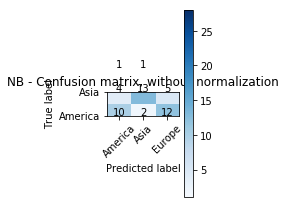

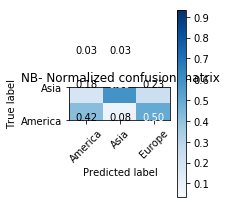

In [58]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_bayes_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
labels = np.unique(y_test)

plot3 = plt.figure(figsize=(len(labels), len(labels)))
sp.plot_confusion_matrix(cnf_matrix, classes=labels,
                      title='NB - Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot4 = plt.figure(figsize=(len(labels), len(labels)))
sp.plot_confusion_matrix(cnf_matrix, classes=labels, normalize=True,
                      title='NB- Normalized confusion matrix')
plt.show()

#name = 'full_country_decade + feature selection'
pp = PdfPages('cm - FINAL feature selection' + name + '.pdf')
pp.savefig(plot1)
pp.savefig(plot2)
pp.savefig(plot3)
pp.savefig(plot4)
pp.close()

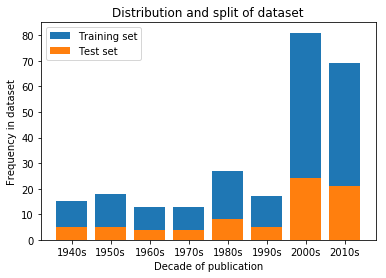

In [26]:
complete, counts = np.unique(label_data, return_counts=True)
train, num = np.unique(y_train, return_counts=True)
test, tel = np.unique(y_test, return_counts=True)
#p1 = plt.bar(complete, counts)
p2 = plt.bar(train, num, bottom=tel)
p3 = plt.bar(test, tel)

plt.ylabel('Frequency in dataset')
plt.xlabel("Decade of publication")
plt.title('Distribution and split of dataset')
#plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p2[0], p3[0]), ('Training set', 'Test set'))

plt.show()

# Decision tree trained on raw data

In [176]:
# load data and fit
raw_input = []
raw_label = []

for i in sequences_lt:
    raw_input.append(i[:-4])
    raw_label.append(str(i[-4]))   

#print(raw_input[0][-135:-2])
#decision_tree = tr.fit(raw_input, raw_label)
#print(decision_tree)

In [177]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

raw = np.full([len(raw_input),len(max(raw_input, key = lambda x: len(x)))], 'none')
for i,j in enumerate(raw_input):
    raw[i][0:len(j)] = j
    

coder = LabelEncoder()
coder.fit(raw[0])

new_raw = np.empty(raw.shape)
for index, val in enumerate(raw):
    new_raw[index] = coder.transform(val)


### Raw data scikit learn tree

In [178]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(new_raw, raw_label, test_size = 0.3, random_state = 100)

In [179]:
#Xr_train = []
print(Xr_train[0:5])

[[0. 2. 7. ... 6. 6. 6.]
 [3. 2. 8. ... 6. 6. 6.]
 [3. 2. 3. ... 6. 6. 6.]
 [5. 2. 7. ... 6. 6. 6.]
 [3. 2. 1. ... 6. 6. 6.]]


In [180]:
raw_tree = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2)


raw_tree.fit(Xr_train, yr_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [181]:
y_pred = raw_tree.predict(Xr_test)
y_pred

array(['2000s', '1970s', '2000s', '2000s', '1980s', '2010s', '1960s',
       '2010s', '2010s', '1950s', '1970s', '2000s', '2000s', '2010s',
       '2010s', '1950s', '2000s', '2000s', '1940s', '2010s', '1980s',
       '1990s', '2000s', '2010s', '1990s', '2000s', '2000s', '2000s',
       '2000s', '2010s', '2000s', '2000s', '1960s', '2000s', '2000s',
       '2010s', '2010s', '2010s', '2000s', '1940s', '1940s', '2000s',
       '2000s', '2010s', '2000s', '2000s', '2010s', '2000s', '1950s',
       '2000s', '2000s', '1960s', '2000s', '2000s', '2000s', '2000s',
       '1950s', '1990s', '2000s', '2000s', '1940s', '2010s', '1980s',
       '2010s', '2000s', '2000s', '1980s', '2010s', '1990s', '2010s',
       '1980s', '2010s', '1970s', '2010s', '2010s', '2000s'], dtype='<U5')

In [182]:
scores = cross_val_score(raw_tree, new_raw, raw_label, cv=10)
scores

array([0.31, 0.29, 0.32, 0.27, 0.42, 0.4 , 0.36, 0.17, 0.36, 0.14])

In [183]:
print("Accuracy is ", accuracy_score(yr_test,y_pred)*100)
print('Average fold accuracy is ', np.mean(scores)*100)

Accuracy is  25.0
Average fold accuracy is  30.502019270085235


Confusion matrix, without normalization
[[ 0  0  0  0  0  0  4  1]
 [ 1  1  0  0  1  0  2  1]
 [ 0  0  1  0  1  1  2  1]
 [ 0  0  0  1  0  0  3  1]
 [ 1  0  0  0  1  1  2  1]
 [ 0  0  0  1  1  0  2  2]
 [ 1  1  1  0  0  1  8  6]
 [ 1  2  1  1  1  1 10  7]]
Normalized confusion matrix
[[0.   0.   0.   0.   0.   0.   0.8  0.2 ]
 [0.17 0.17 0.   0.   0.17 0.   0.33 0.17]
 [0.   0.   0.17 0.   0.17 0.17 0.33 0.17]
 [0.   0.   0.   0.2  0.   0.   0.6  0.2 ]
 [0.17 0.   0.   0.   0.17 0.17 0.33 0.17]
 [0.   0.   0.   0.17 0.17 0.   0.33 0.33]
 [0.06 0.06 0.06 0.   0.   0.06 0.44 0.33]
 [0.04 0.08 0.04 0.04 0.04 0.04 0.42 0.29]]


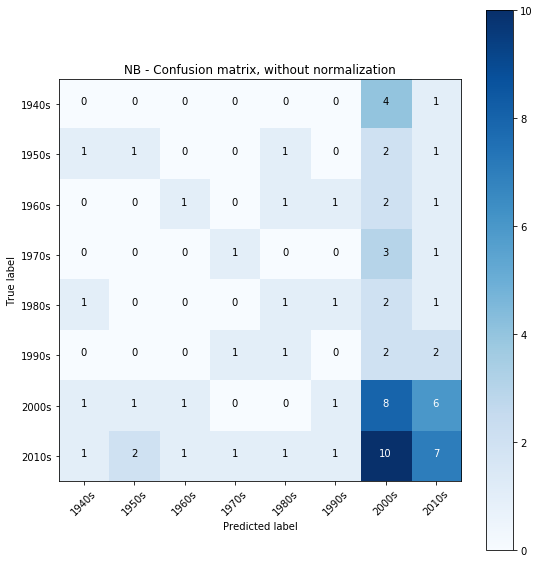

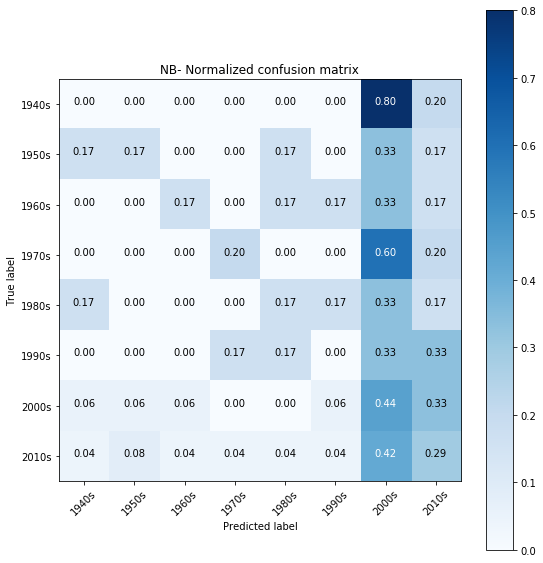

In [184]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(yr_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
labels = np.unique(yr_test)

plot3 = plt.figure(figsize=(len(labels), len(labels)))
sp.plot_confusion_matrix(cnf_matrix, classes=labels,
                      title='NB - Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot4 = plt.figure(figsize=(len(labels), len(labels)))
sp.plot_confusion_matrix(cnf_matrix, classes=labels, normalize=True,
                      title='NB- Normalized confusion matrix')
plt.show()

### Raw data naïve Bayes

In [185]:
clf_bayes = GaussianNB()
clf_bayes.fit(Xr_train, yr_train)

GaussianNB(priors=None)

In [186]:
y_bayes_pred = clf_bayes.predict(Xr_test)
y_bayes_pred


array(['1970s', '1970s', '1970s', '1970s', '1970s', '1940s', '1970s',
       '1970s', '1970s', '1940s', '1970s', '1940s', '1970s', '1970s',
       '1940s', '1970s', '1970s', '1970s', '1970s', '1970s', '1970s',
       '1970s', '1970s', '1970s', '1970s', '1970s', '1940s', '1970s',
       '1970s', '1940s', '1970s', '1970s', '1940s', '1980s', '1970s',
       '1970s', '1940s', '1970s', '1970s', '1940s', '1970s', '1970s',
       '1970s', '1940s', '1970s', '1970s', '1940s', '1970s', '1960s',
       '1970s', '1970s', '1970s', '1970s', '1970s', '1970s', '1970s',
       '1970s', '1970s', '1970s', '1970s', '1970s', '1970s', '1970s',
       '1970s', '1970s', '1970s', '1960s', '1970s', '1940s', '1940s',
       '1970s', '1970s', '1970s', '1970s', '1970s', '1970s'], dtype='<U5')

In [187]:
scores_b = cross_val_score(clf_bayes, new_raw, raw_label, cv=10)
scores_b

array([0.24, 0.21, 0.07, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.05])

In [188]:
print("Accuracy is ", accuracy_score(yr_test, y_bayes_pred)*100)
print('Average fold accuracy is ', np.mean(scores_b)*100)

Accuracy is  9.210526315789473
Average fold accuracy is  8.205685269253484


Confusion matrix, without normalization
[[ 0  0  0  5  0  0  0  0]
 [ 0  0  1  5  0  0  0  0]
 [ 3  0  1  2  0  0  0  0]
 [ 0  0  0  5  0  0  0  0]
 [ 0  0  0  5  1  0  0  0]
 [ 0  0  0  6  0  0  0  0]
 [ 5  0  0 13  0  0  0  0]
 [ 5  0  0 19  0  0  0  0]]
Normalized confusion matrix
[[0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.17 0.83 0.   0.   0.   0.  ]
 [0.5  0.   0.17 0.33 0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.83 0.17 0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.28 0.   0.   0.72 0.   0.   0.   0.  ]
 [0.21 0.   0.   0.79 0.   0.   0.   0.  ]]


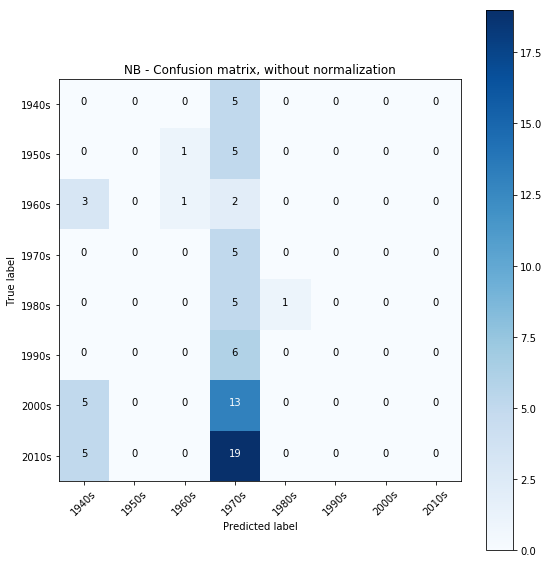

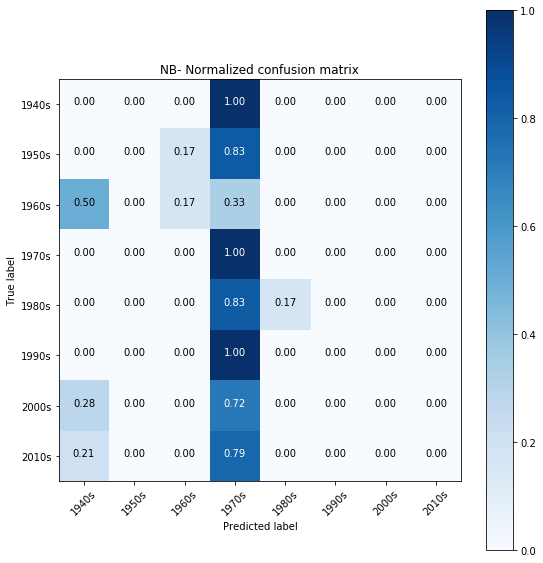

In [189]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(yr_test, y_bayes_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
labels = np.unique(yr_test)

plot3 = plt.figure(figsize=(len(labels), len(labels)))
sp.plot_confusion_matrix(cnf_matrix, classes=labels,
                      title='NB - Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot4 = plt.figure(figsize=(len(labels), len(labels)))
sp.plot_confusion_matrix(cnf_matrix, classes=labels, normalize=True,
                      title='NB- Normalized confusion matrix')
plt.show()

## Visualization of decision trees

In [36]:
import graphviz
import os
#path = "E:\Program Files (x86)\Graphviz\\bin\\" #Desktop
#path = 'C:\Program files (x86)\Graphviz2.38\\bin\\' #laptop
#os.environ["PATH"] += os.pathsep + path
#print(os.environ['PATH'])

# create feature labels
features = []
for i in alt_d:
    #if len(l) > 21:
    #    break
    #else:
        features.append(i)

class_names = np.unique(y_train)
#classes = tree_model.classes_
print(class_names)
dot_data = tree.export_graphviz(tree_model, out_file=None, 
                         feature_names=features,  
                         class_names=class_names,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.render("dt - " + name + " feature selection")

dot_data = tree.export_graphviz(tree_model, out_file=None, 
                         feature_names=features,  
                         class_names=class_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

['American_1940s' 'American_1950s' 'American_1970s' 'American_1980s'
 'American_1990s' 'American_2000s' 'American_2010s' 'Chinese_2000s'
 'Dutch_1940s' 'Dutch_1950s' 'Dutch_1960s' 'Dutch_1970s' 'Dutch_1980s'
 'Dutch_1990s' 'Dutch_2000s' 'Dutch_2010s' 'Flemish_1950s' 'Flemish_1960s'
 'Flemish_1970s' 'Flemish_1980s' 'Flemish_1990s' 'Flemish_2000s'
 'Flemish_2010s' 'French_2000s' 'French_2010s' 'Japanese_2000s'
 'Japanese_2010s' 'Korean_2000s']


ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'dt - country feature selection'], make sure the Graphviz executables are on your systems' PATH

[  1   1   1 ...   1 593 751]
Optimal number of features : 1598 / 2912


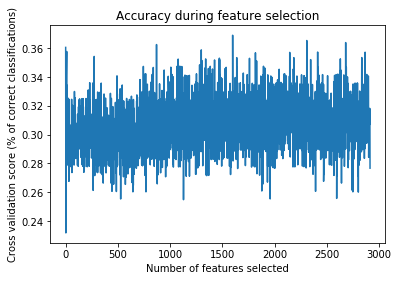

In [193]:
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# The "accuracy" scoring is proportional to the number of correct
# classifications
#rfecv = RFECV(estimator=tree_model, step=1, cv=StratifiedKFold(4, random_state=100),
             # scoring='accuracy')
#rfecv.fit(Xr_train, yr_train)

print(rfecv.ranking_)

print("Optimal number of features : %d /" % rfecv.n_features_, len(new_raw[0]))

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (% of correct classifications)")
plt.title('Accuracy during feature selection')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [194]:
first_feat, second_feat, third_feat = [], [], []

for index, value in enumerate(alt_d.keys()):
    if rfecv.ranking_[index] == 1:
        first_feat.append(value)
    if rfecv.ranking_[index] == 2:
        second_feat.append(value)
    if rfecv.ranking_[index] == 3:
        third_feat.append(value)

sp.save_obj(first_feat, name + ' - most important_features')
sp.save_obj(second_feat, name + ' - second most important features')
sp.save_obj(third_feat, name + ' - Third most important features')
print(first_feat, len(first_feat))
print(second_feat, len(second_feat))
print(third_feat, len(third_feat))

NameError: name 'alt_d' is not defined

### Check important feature frequency in comic books

In [ ]:
# Print country, decade, continent of cb containing important features

In [85]:
def create_feat_dicts(sequences, first, second, third):

    f_feat_dict = {}
    s_feat_dict = {}
    t_feat_dict = {}
    for feat in first:
        for cb in sequences:
            key = tuple(cb[-1])
            if list(feat) in cb and not feat in f_feat_dict:
                f_feat_dict[feat] = []
                f_feat_dict[feat].append(key)
            elif list(feat) in cb and feat in f_feat_dict:
                f_feat_dict[feat].append(key)
        
    for feat in second:
        for cb in sequences:
            key = tuple(cb[-1])
            if list(feat) in cb and not feat in s_feat_dict:
                s_feat_dict[feat] = []
                s_feat_dict[feat].append(list(key))
            elif list(feat) in cb and feat in s_feat_dict:
                s_feat_dict[feat].append(list(key))
        
    for feat in third:
        for cb in sequences:
            key = tuple(cb[-1])
            if list(feat) in cb and not feat in t_feat_dict:
                t_feat_dict[feat] = []
                t_feat_dict[feat].append(list(key))
            elif list(feat) in cb and feat in t_feat_dict:
                t_feat_dict[feat].append(list(key))
                
    return f_feat_dict, s_feat_dict, t_feat_dict

one, two, three = create_feat_dicts(lt, first_feat, second_feat, third_feat)

print('\n FIRST \n')
print( one)
print('\n SECOND \n')
print( two)
print('\n THIRD \n')
print( three)


 FIRST 

{('mono', 'character_change', 'mono'): [('1980s', 'Europe', 'Flemish', 'Flemish_1980s'), ('1980s', 'Europe', 'Flemish', 'Flemish_1980s'), ('1980s', 'Europe', 'Flemish', 'Flemish_1980s'), ('1980s', 'Europe', 'Flemish', 'Flemish_1980s'), ('1940s', 'Europe', 'Dutch', 'Dutch_1940s'), ('1960s', 'Europe', 'Dutch', 'Dutch_1960s'), ('1960s', 'Europe', 'Dutch', 'Dutch_1960s'), ('1960s', 'Europe', 'Flemish', 'Flemish_1960s'), ('1960s', 'Europe', 'Dutch', 'Dutch_1960s'), ('1970s', 'Europe', 'Flemish', 'Flemish_1970s'), ('1980s', 'Europe', 'Dutch', 'Dutch_1980s'), ('1990s', 'Europe', 'Flemish', 'Flemish_1990s'), ('2000s', 'Europe', 'Flemish', 'Flemish_2000s'), ('2010s', 'Europe', 'Flemish', 'Flemish_2010s'), ('2000s', 'Asia', 'Korean', 'Korean_2000s'), ('2000s', 'Asia', 'Japanese', 'Japanese_2000s'), ('2010s', 'America', 'American', 'American_2010s'), ('2010s', 'Asia', 'Japanese', 'Japanese_2010s'), ('2010s', 'Asia', 'Japanese', 'Japanese_2010s'), ('2000s', 'America', 'American', 'Americ

In [88]:
# helper function to collect overal frequencies of classes
buf_temp = []
for each in tree_data:
    buf_temp.append(each[-4:])

un = []
for k in buf_temp:
    un.append(k[setting-4])

un_class, un_count = np.unique(un, return_counts=True)

In [89]:
def normalize(part_class, part_count, com_class, com_count):
    lst = []
    part_lst = []
    for a in range(len(part_class)):
        for b in range(len(com_class)):
            if part_class[a] == com_class[b] and part_count[a] > 3:
                lst.append((part_count[a] / com_count[b]))
                part_lst.append(part_class[a])
    return part_lst, lst

plot_labels = []
unique = []
spec_dict = {}
for index, value in enumerate(one.keys()):
    spec_dict[value] = 1
    plot_labels = one[value]
    unique = []
    for j, key in enumerate(plot_labels):
        unique.append(plot_labels[j][-setting])
    uniq_class, uniq_count = np.unique(unique, return_counts=True)
    spec_dict[value] = normalize(uniq_class, uniq_count, un_class, un_count)
    

print(spec_dict)

{('mono', 'character_change', 'mono'): (['American', 'Chinese', 'Dutch', 'Flemish', 'French', 'Japanese', 'Korean'], [0.26582278481012656, 1.0, 0.125, 0.225, 0.4, 0.7727272727272727, 0.32]), ('micro', 'character_change', 'time_change', 'macro'): (['American', 'Dutch', 'Flemish', 'French', 'Japanese', 'Korean'], [0.20253164556962025, 0.2, 0.325, 0.3333333333333333, 0.6818181818181818, 0.28]), ('mono', 'character_change', 'spatial_change', 'amorphic'): (['American', 'Chinese', 'Japanese'], [0.43037974683544306, 0.6666666666666666, 0.8181818181818182]), ('macro', 'character_change', 'causal_change', 'time_change', 'macro'): (['American', 'Dutch', 'Flemish', 'French', 'Japanese', 'Korean'], [0.7721518987341772, 0.925, 0.925, 0.7333333333333333, 0.5454545454545454, 0.2]), ('macro', 'time_change', 'macro', 'character_change', 'time_change', 'macro'): (['American', 'Dutch', 'Flemish', 'French', 'Japanese'], [0.17721518987341772, 0.95, 0.925, 0.6, 0.22727272727272727])}


In [90]:
dfd = pd.DataFrame(spec_dict).T
dfd.to_csv(name+'.csv', index=True)

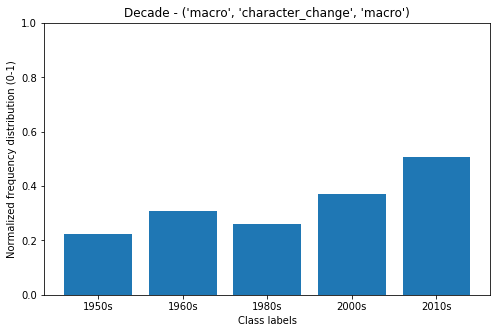

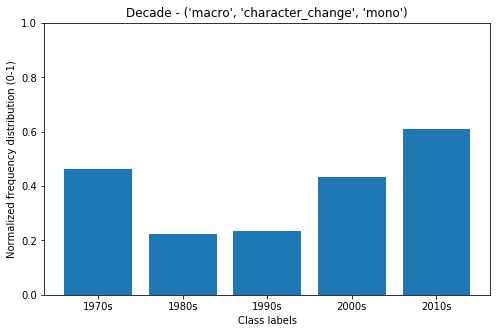

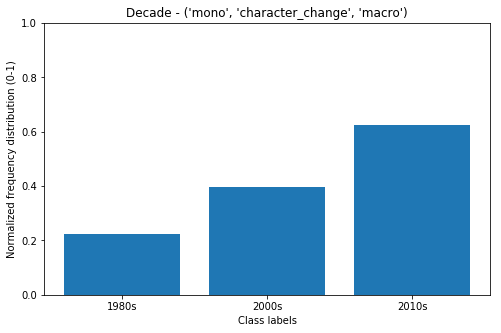

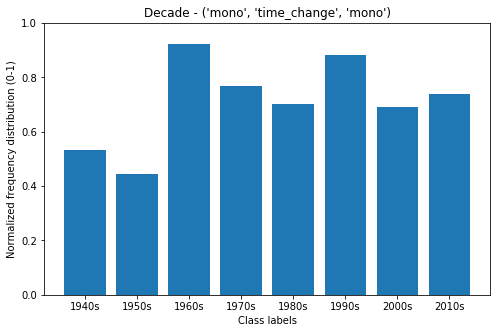

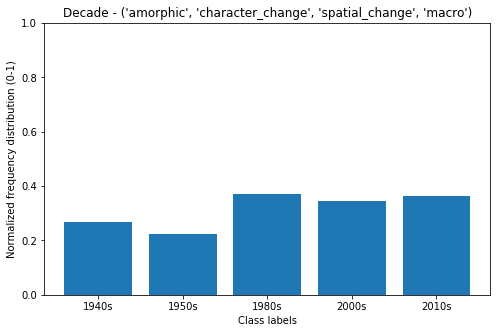

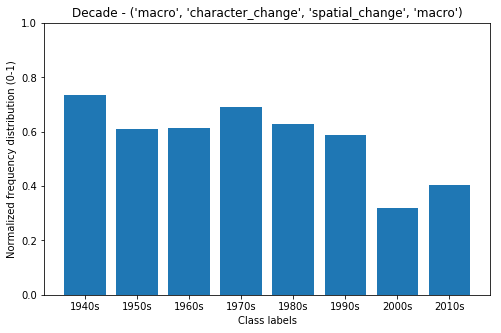

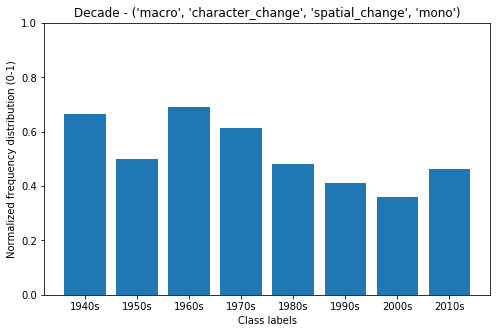

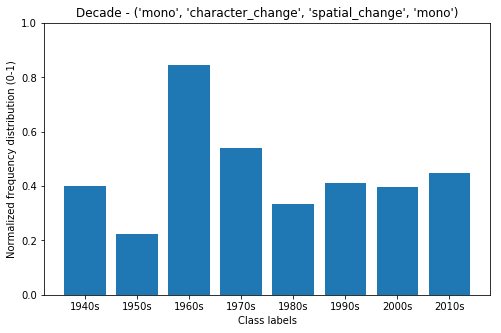

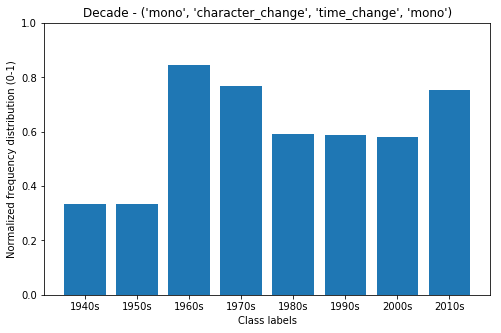

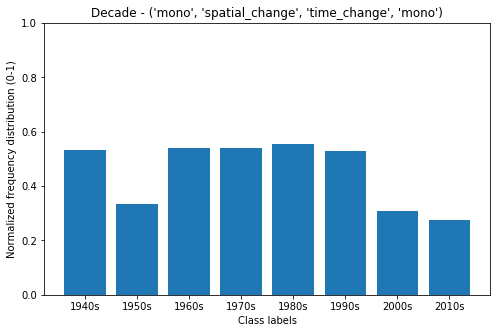

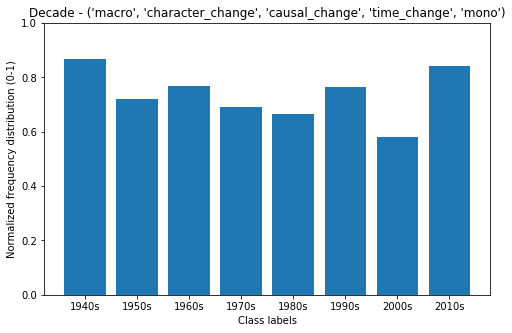

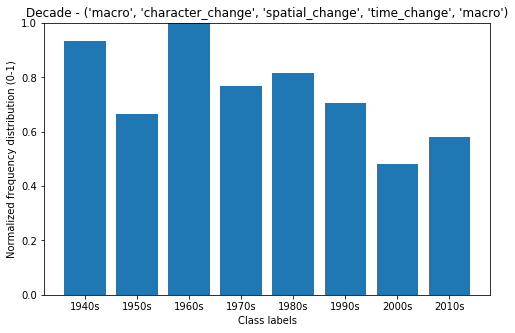

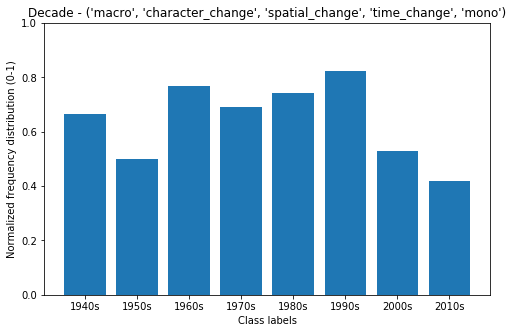

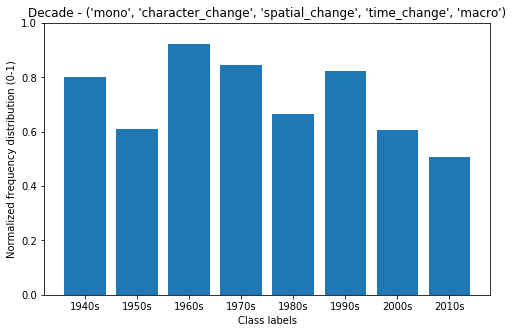

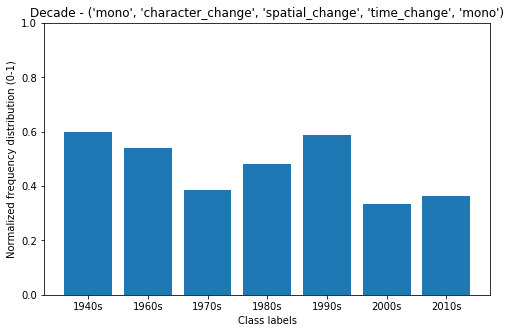

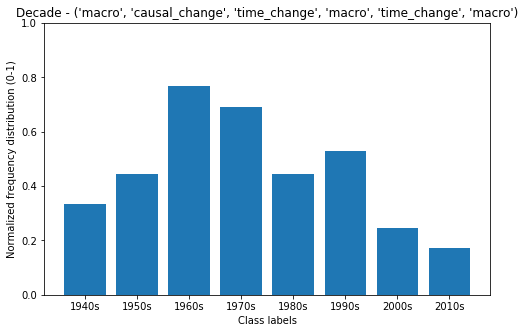

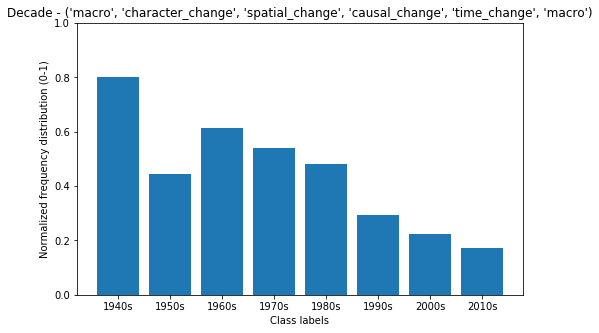

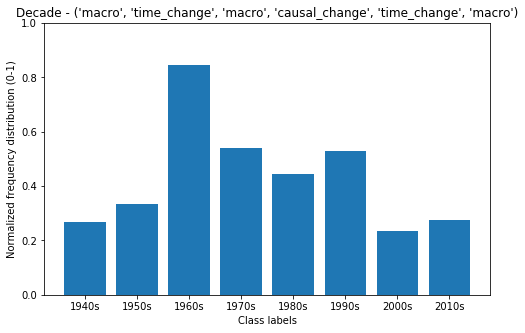

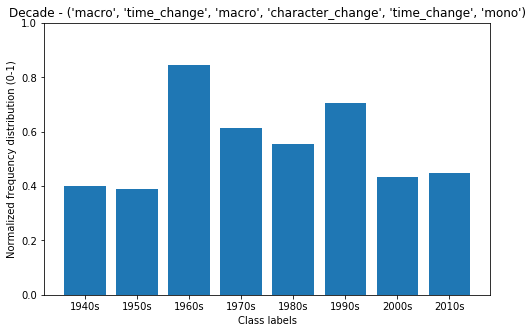

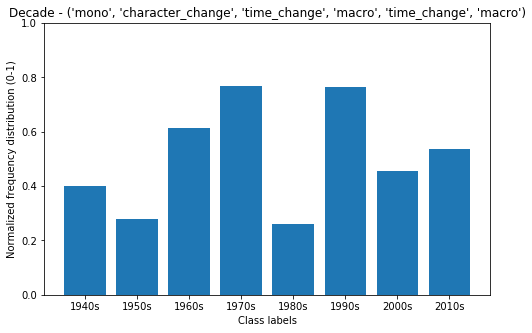

In [114]:
#plt.bar(uniq_class, uniq_count)
#plt.show()

def loop_plot(plots):
    figs={}
    axs={}
    for idx,plot in enumerate(plots):
        grap = plots[plot]
        figs[plot]=plt.figure(figsize=(8, 5))
        
        axs[plot]=figs[plot].add_subplot(111)
        axs[plot].bar(grap[0],grap[1])
        axs[plot].set_title(name + ' - ' + str(plot))
        axs[plot].set_ylabel('Normalized frequency distribution (0-1)')
        axs[plot].set_xlabel('Class labels')
        axs[plot].set_ylim(0,1)
    
    return figs, axs

figs, axs = loop_plot(spec_dict)
plotaxs = list(axs.keys())

pp = PdfPages('Pattern distribution FINAL - ' + name + '.pdf')
for z in range(len(plotaxs)):
    pp.savefig(figs[plotaxs[z]])
pp.close()

In [369]:
#normalize
buf_temp = []
for each in tree_data:
    buf_temp.append(each[-4:])

un = []
for k in buf_temp:
    un.append(k[2])

un_class, un_count = np.unique(un, return_counts=True)

#print(un_class, un_count)
#print(uniq_count / un_count)

#for ind, outpt in enumerate()

ziped = zip(un_class, un_count)